<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/MoDesc_Aprendizado_descritivo_atividade_01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 3:** Buscador de músicas através de palavras chave

* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano de Albuquerque*
* *Yaci Mair da Silva Ribeiro*


**Descrição**

Explorar a base de dados e criar um buscador simples que calcula a distância entre um texto inserido e os nomes de músicas em um conjunto de dados.

# Importando os dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2001/dados/dataset_lyrics.csv')

In [ ]:
df.head()

,cantorId,cantorNome,musicaNome,letra
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...
1,0,10000-maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close..."
2,0,10000-maniacs,These Are Days,These are. These are days you'll remember. Nev...
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an..."
4,0,10000-maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49387 entries, 0 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    49387 non-null  int64 
 1   cantorNome  49387 non-null  object
 2   musicaNome  49387 non-null  object
 3   letra       49376 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


# Removendo dados faltantes

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49376 entries, 0 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    49376 non-null  int64 
 1   cantorNome  49376 non-null  object
 2   musicaNome  49376 non-null  object
 3   letra       49376 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


# Removendo duplicatas

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38756 entries, 0 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    38756 non-null  int64 
 1   cantorNome  38756 non-null  object
 2   musicaNome  38756 non-null  object
 3   letra       38756 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


Continua com a observação dos dados

In [ ]:
df

,cantorId,cantorNome,musicaNome,letra
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...
1,0,10000-maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close..."
2,0,10000-maniacs,These Are Days,These are. These are days you'll remember. Nev...
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an..."
4,0,10000-maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...
...,...,...,...,...
49382,525,paul-mccartney,Ode To Koala Bear,"Oh, I love you, I still care.. All my affectio..."
49383,525,paul-mccartney,Off The Ground,There must have been a lot of heartache. For y...
49384,525,paul-mccartney,"Oh Woman, Oh Why","Oh woman, oh why, why, why, why. What have I d..."
49385,525,paul-mccartney,Old Siam Sir,"In a village in Old Siam, sir, there's a lady ..."


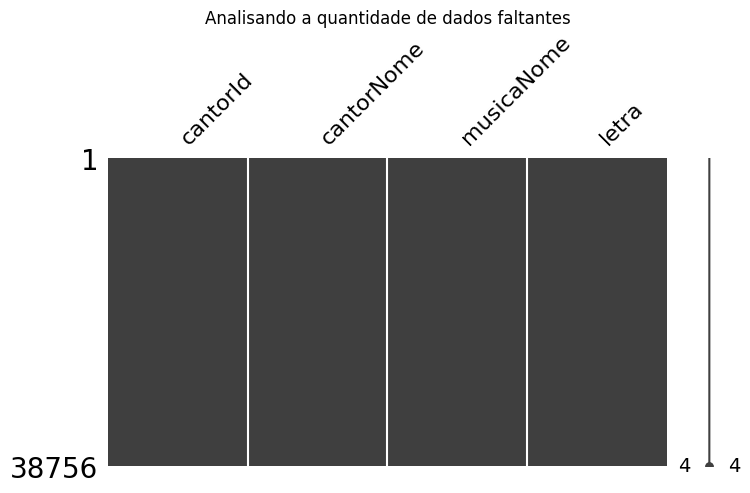

In [ ]:
import missingno as msno

msno.matrix(df, figsize=(8,4))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

# Limpando e normalizando os dados

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.7 MB/s eta 0:00:00


Função para formatação de texto

In [ ]:
import re
from unidecode import unidecode

def clean_and_normalize(text):
    # Remoção de caracteres especiais e pontuações
    cleaned_text = re.sub(r'[^\w\s]', ' ', text)

    # Normalização para minúsculas e remoção de acentos
    normalized_text = unidecode(cleaned_text.lower())

    # Remoção de espaços extras e espaços em branco no início e final
    final_text = ' '.join(normalized_text.split())

    return final_text

# Aplicando a função a todas as colunas de texto do DataFrame
text_columns = ['cantorNome', 'musicaNome', 'letra']
for col in text_columns:
    df[col] = df[col].apply(clean_and_normalize)

# Analisando os dados

## Quais os cantores com mais músicas?

In [ ]:
cantores_num = df['cantorNome'].value_counts()

In [ ]:
df['cantorNome'].value_counts()

elvis presley                    759
bob dylan                        544
neil young                       490
bruce springsteen                480
elvis costello                   476
                                ... 
lcsilva                            1
marcos elemento                    1
legiao 138                         1
marcelo miglioli e bryan ryus      1
leo diaz                           1
Name: cantorNome, Length: 526, dtype: int64

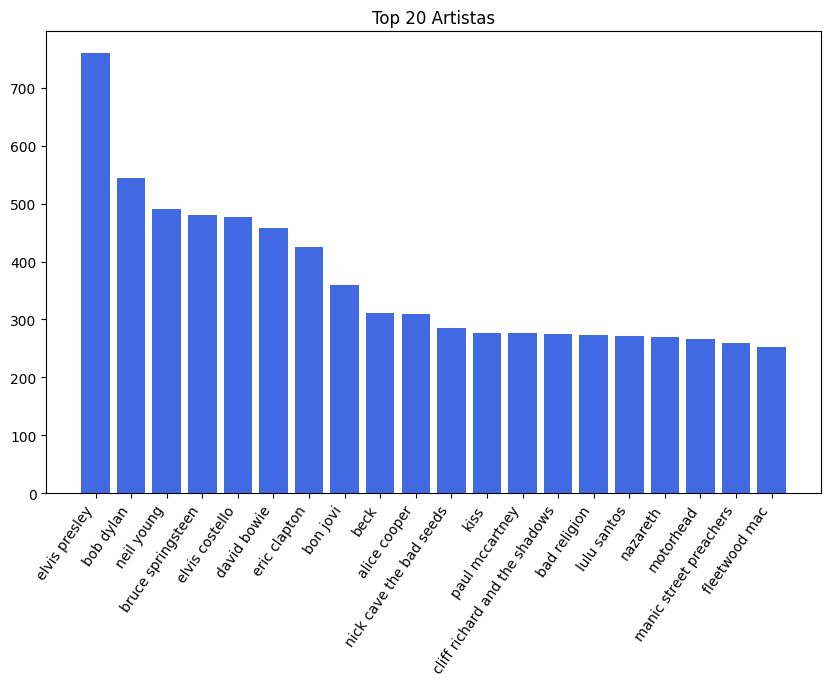

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(cantores_num.index[:20], cantores_num.values[:20], color='royalblue')
plt.title('Top 20 Artistas')
plt.xticks(rotation=55, ha='right')
plt.show()

## Quais as músicas mais populares cantadas por mais de um cantor?

In [ ]:
# formatando os nomes das músicas para minúsculo
df['musicaNome'] = df['musicaNome'].str.lower()

musicas_num = df['musicaNome'].value_counts()
musicas_num[:10]

hold on               18
walk away             17
home                  16
intro                 15
time                  14
wish you were here    12
without you           12
broken                11
alone                 11
coming home           11
Name: musicaNome, dtype: int64

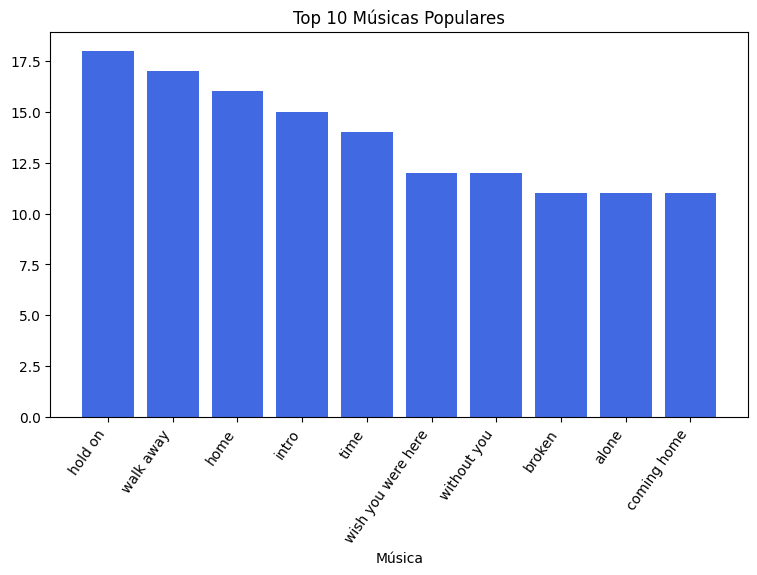

In [ ]:
plt.figure(figsize=(9, 5))
plt.bar(musicas_num.index[:10], musicas_num.values[:10], color='royalblue')
plt.title('Top 10 Músicas Populares')
plt.xticks(rotation=55, ha='right')
plt.xlabel('Música')
plt.show()

## Quais as palavras mais frequentes nas letras das músicas?

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def most_frequent_words():
  # Concatenar todas as letras de músicas em um único texto
  all_lyrics = ' '.join(df['letra'])

  # Tokenizar as palavras
  words = word_tokenize(all_lyrics)

  # Filtrar palavras com pelo menos três letras
  words = [word for word in words if len(word) >= 4]

  # Calcular a frequência das palavras
  freq_dist = FreqDist(words)

  # Encontrar a palavra mais frequente
  most_common_word = freq_dist.most_common(1)[0][0]

  # Encontrar a palavra mais frequente
  most_common_words = freq_dist.most_common(10)  # Altere o número para obter mais palavras

  print("As palavras mais frequentes nas músicas são:\n")
  for word, freq in most_common_words:
    print(f"{word}: {freq} ocorrências")

most_frequent_words()

As palavras mais frequentes nas músicas são:

your: 66804 ocorrências
that: 63733 ocorrências
know: 36726 ocorrências
love: 34721 ocorrências
just: 34305 ocorrências
this: 34220 ocorrências
what: 33834 ocorrências
with: 32077 ocorrências
when: 30274 ocorrências
like: 30026 ocorrências


## Fazer busca por uma palavras chave nas músicas

### Buscador simples

Busca todos os nomes de músicas e seus respectivos artistas que contém o texto de busca

In [ ]:
# Função de busca por palavra-chave
def search_lyrics(query):
  # Remove caracteres especiais
  query = unidecode(query.lower())
  return df[df['letra'].str.contains(query, case=False, na=False)]

query = input("Digite o texto de busca: ")
search_result = search_lyrics(query)
print("\nResultados da busca:\n")
print(search_result[['cantorNome', 'musicaNome']].head(10))
print("\nNuméro de músicas encontradas: ", len(search_result))

Digite o texto de busca: saudade

Resultados da busca:

     cantorNome           musicaNome
833       abril     paraiso singular
840       abril        segunda feira
1865     agnela              a gente
2278    aliados          meu caminho
2283    aliados     deixa eu mostrar
2349    aliados  pra matar a saudade
2355    aliados              saudade
2358    aliados               sereia
3084  alter ego      notas sobre ela
4054  autoramas            voce sabe

Numéro de músicas encontradas:  257


### Buscador com distância

In [ ]:
import scipy

Distância de Jaccard

In [ ]:
data = df

# distância de Jaccard mede a similatidade entre dois conjuntos de dados
def jaccard_distance(s1, s2):
    set1 = set(s1)
    set2 = set(s2)
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    return 1 - (intersection / union)

# percorre cada nome de música e insere o valor da distância em relação ao texto de busca
def song_search_jaccard(query):
    query = query.lower()
    data['distance'] = data['musicaNome'].apply(lambda x: jaccard_distance(query, x.lower()))
    results = data.sort_values(by='distance', ascending=True)
    return results[['cantorNome', 'musicaNome', 'distance']].head(10)

# Interface de busca
def main():
    search_text = input("Digite o texto de busca: ")
    search_results_jaccard = song_search_jaccard(search_text)
    print("\nResultados da busca:")
    print(search_results_jaccard)

In [ ]:
main()

Digite o texto de busca: fire

Resultados da busca:
              cantorNome musicaNome  distance
33556              kerli       fire       0.0
9812   bruce springsteen       fire       0.0
33248           kasabian       fire       0.0
11353          camp rock       fire       0.0
30809       jimi hendrix       fire       0.0
3812        arthur brown       fire       0.0
18201             dr sin       fire       0.0
15849       danni carlos       fire       0.0
47744      ozzy osbourne       fire       0.0
2469        alice cooper       fire       0.0


Distância de hamming

In [ ]:
def hamming_distance(s1, s2):
    # Certifique-se de que as strings têm o mesmo comprimento
    if len(s1) != len(s2):
        return float('inf')  # Retorne um valor alto para indicar que as strings têm comprimentos diferentes
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

def song_search_hamming(query):
    query = query.lower()
    df['distance'] = df['musicaNome'].apply(lambda x: hamming_distance(query, x.lower()))
    results = df.sort_values(by='distance', ascending=True)
    return results[['cantorNome', 'musicaNome', 'distance']].head(20)

def main1():
    search_text = input("Digite o texto de busca: ")
    search_results_hamming = song_search_hamming(search_text)
    print("\nResultados da busca:")
    print(search_results_hamming)



In [ ]:
main1()

Digite o texto de busca: fire

Resultados da busca:
                      cantorNome musicaNome  distance
33556                      kerli       fire       0.0
33248                   kasabian       fire       0.0
9812           bruce springsteen       fire       0.0
15849               danni carlos       fire       0.0
11353                  camp rock       fire       0.0
3812                arthur brown       fire       0.0
2469                alice cooper       fire       0.0
18201                     dr sin       fire       0.0
47744              ozzy osbourne       fire       0.0
30809               jimi hendrix       fire       0.0
31205  joan jett the blackhearts       five       1.0
15029                      creed       hide       2.0
9495                   boogarins       erre       2.0
48961                patti smith       nine       2.0
34593                       korn       fake       2.0
15020                      creed       time       2.0
35477              lenny kravi

Buscador com opções

In [ ]:
def search_word_frequency(word):
    word = word.lower()

    # Concatenar todas as letras de músicas em um único texto
    all_lyrics = ' '.join(df['letra'])

    # Tokenizar as palavras
    words = word_tokenize(all_lyrics)

    # Filtrar palavras com pelo menos três letras
    words = [word for word in words if len(word) >= 4]

    # Calcular a frequência das palavras
    freq_dist = FreqDist(words)

    word_count = freq_dist[word] if word in freq_dist else 0
    print(f"\nA palavra '{word}' aparece {word_count} vezes.")

def search_artist_info(artist_name):
    artist_name = artist_name.lower()
    artist_songs = data[data['cantorNome'].str.lower() == artist_name]
    num_songs = len(artist_songs)
    print(f"\nO cantor '{artist_name}' tem {num_songs} músicas.")

    # Concatenar letras de músicas do cantor em um único texto
    artist_lyrics = ' '.join(artist_songs['letra'])
    artist_words = word_tokenize(artist_lyrics)
    artist_words = [word for word in artist_words if len(word) >= 4]
    artist_freq_dist = FreqDist(artist_words)
    artist_common_words = artist_freq_dist.most_common(10)

    print("\nAs palavras mais frequentes nas músicas do cantor são:")
    for word, freq in artist_common_words:
        print(f"{word}: {freq} ocorrências")

def main():
    print("Escolha uma opção: \n")
    print("1 - Pesquisar palavra e exibir frequência")
    print("2 - Pesquisar cantor e exibir informações")
    choice = int(input())

    if choice == 1:
        search_word = input("\nDigite a palavra para pesquisar: \n")
        search_word_frequency(search_word)
    elif choice == 2:
        artist_name = input("\nDigite o nome do cantor para pesquisar: \n")
        search_artist_info(artist_name)
    else:
        print("\nOpção inválida.")

#if _name_ == "_main_":
#  main()

In [ ]:
main()

Escolha uma opção: 

1 - Pesquisar palavra e exibir frequência
2 - Pesquisar cantor e exibir informações
3

Opção inválida.


In [ ]:
main()

Escolha uma opção: 

1 - Pesquisar palavra e exibir frequência
2 - Pesquisar cantor e exibir informações
1

Digite a palavra para pesquisar: 
love

A palavra 'love' aparece 34721 vezes.


In [ ]:
main()

Escolha uma opção: 

1 - Pesquisar palavra e exibir frequência
2 - Pesquisar cantor e exibir informações
2

Digite o nome do cantor para pesquisar: 
lulu santos

O cantor 'lulu santos' tem 271 músicas.

As palavras mais frequentes nas músicas do cantor são:
voce: 349 ocorrências
mais: 244 ocorrências
vida: 162 ocorrências
tudo: 155 ocorrências
amor: 149 ocorrências
como: 132 ocorrências
gente: 123 ocorrências
quero: 119 ocorrências
minha: 116 ocorrências
quando: 109 ocorrências
